In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mlflow

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#### Conhecendo os dados

In [113]:
df = pd.read_csv('../../data/external/survey_lung_cancer.csv')
print(df.shape)
df.head(3)

(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [115]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [116]:
colunas = {'chronic disease': 'chronic_disease',
           'alcohol consuming': 'alcohol_consuming',
           'shortness of breath': 'shortness_of_breath',
           'swallowing difficulty': 'swallowing_difficulty',
           'chest pain': 'chest_pain'
           }

df.rename(columns=colunas, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

Vamos transformar tudo em 0 ou 1 pra facilitar a leitura.

In [118]:
df = df.replace(1, 0)


In [119]:
df = df.replace(2, 1)

In [120]:
df['lung_cancer'] = df['lung_cancer'].replace('YES', 1)
df['lung_cancer'] = df['lung_cancer'].replace('NO', 0)

/tmp/ipykernel_91697/2928520676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['lung_cancer'] = df['lung_cancer'].replace('NO', 0)


In [121]:
df['gender'] = df['gender'].replace('M', 0)
df['gender'] = df['gender'].replace('F', 1)

/tmp/ipykernel_91697/3130155677.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('F', 1)


In [122]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [168]:
df.to_csv('../../data/processed/processed_data_lung_cancer.csv', index=False)

#### Pré-processando os Dados

In [156]:
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']

print(X.shape, y.shape)

(309, 15) (309,)


In [157]:
x_n = X.values
y_n = y.values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [159]:
print(X_train.shape), print(y_train.shape)

(216, 15)
(216,)


(None, None)

#### Iniciando o Experimento

In [129]:
mlflow.set_experiment('lung-cancer-predict')

<Experiment: artifact_location='file:///home/juanvieira/local/lung_cancer/lung-cancer-prediction/src/notebooks/mlruns/713352150384851394', creation_time=1726854066969, experiment_id='713352150384851394', last_update_time=1726854066969, lifecycle_stage='active', name='lung-cancer-predict', tags={}>

In [166]:
rf_params = {
            'max_depth': 5,
            'n_estimators': 100,
            'random_state': 42
             }

with mlflow.start_run(run_name='Random Forest Classifier'):
    
    random_forest = RandomForestClassifier(**rf_params)

    random_forest.fit(X_train, y_train)
    mlflow.sklearn.log_model(random_forest,'Random Forest Classifier',)
    y_pred_test = random_forest.predict(X_test)

    rf_accuracy = accuracy_score(y_test, y_pred_test)
    rf_f1score = f1_score(y_test, y_pred_test, average='binary')
    mlflow.log_metric('Random Forest Classifier: Accuracy', rf_accuracy)
    mlflow.log_metric('Random Forest Classifier: F1 Score', rf_f1score)

2024/09/20 16:09:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


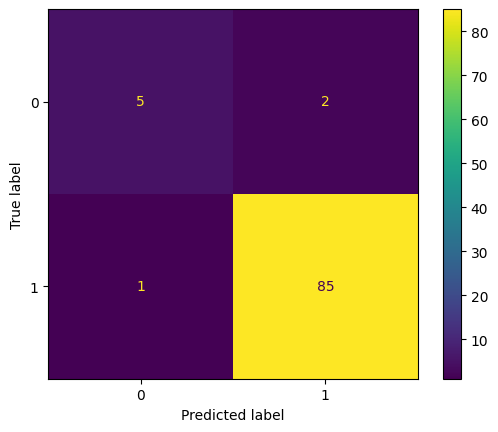

In [160]:
rf_cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.show()